import numpy, pandas, seaborn libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

read csv file and import it as a dataframe

In [2]:
data = pd.read_csv("train_LZdllcl.csv")

In [3]:
#fininding out how many missing values(null values) in dataset
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

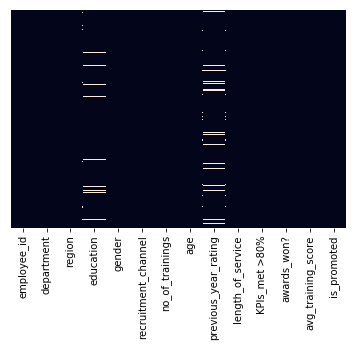

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

Here the missing values of previous_years_rating can be filled approximatedly
as they are dependent on other column values:
1.'is_promoted',
2.'KPIs_met >80%' and
3.'awards won'

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


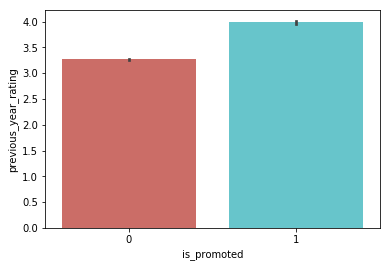

In [5]:
sns.barplot(x='is_promoted',y='previous_year_rating',data=data,palette='hls')
#here avg previous_year_rating is close to 4 for who are promoted and it is 3 for those who are not promoted.

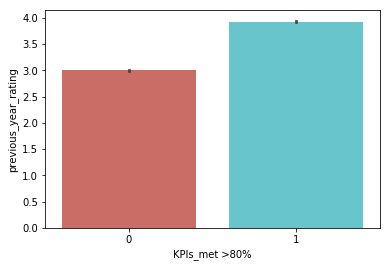

In [6]:
sns.barplot(x='KPIs_met >80%',y='previous_year_rating',data=data,palette='hls')
#here avg previous_year_rating is close to 4 for who met KPIs > 80% and it is 3 for those who are not met KPIs target.

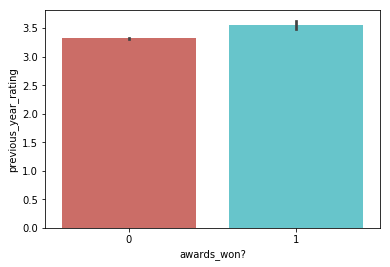

In [7]:
sns.barplot(x='awards_won?',y='previous_year_rating',data=data,palette='hls')
#here avg previous_year_rating is more than 3.5, we take as 4 for who won awards and it is 3 for those who didn't won awards

Replacing null values of previous_year_rating with the following condition:
1. if previous_year_rating is null and promoted then previous_year_rating can take value 4.
2. if previous_year_rating is null and 'KPIs_met >80%' then previous_year_rating can take value 4.
3. if previous_year_rating is null and 'awards_won'=1 then previous_year_rating can take value 4.

In [8]:
data.loc[(data.is_promoted == 1) & (pd.isnull((data.previous_year_rating))),'previous_year_rating'] = 4
data.loc[(data['KPIs_met >80%'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['awards_won?'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4

In [9]:
data['previous_year_rating'].fillna(3, inplace=True)

In [10]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
#Will drop the rows which have the missing values of education column
data = data.dropna()

In [12]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [13]:
education = pd.get_dummies(data.education, drop_first=True)

In [14]:
education.head()

,Below Secondary,Master's & above
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
region = pd.get_dummies(data.region,drop_first=True)
trainings = pd.get_dummies(data.no_of_trainings,drop_first=True)
rating = pd.get_dummies(data.previous_year_rating,drop_first=True)
department = pd.get_dummies(data.department,drop_first=True)
gender = pd.get_dummies(data.gender,drop_first=True)
recruitment_channel = pd.get_dummies(data.recruitment_channel,drop_first=True)

In [16]:
traindata = pd.concat([data,region,education,department,trainings, gender,rating,recruitment_channel], axis=1)

In [17]:
traindata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,8,9,10,m,2.0,3.0,4.0,5.0,referred,sourcing
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,0,1,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,1,0,0,0,1,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,1,0,1,0,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,1,0,0,0,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,1,0,1,0,0,0,0


In [18]:
traindata = traindata.drop(columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating'])

traindata.to_csv('hr-total-cat.csv',index=False)

In [19]:
traindata = pd.read_csv("hr-total-cat1.csv",index_col=0)

In [20]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 65438 to 51526
Data columns (total 65 columns):
age                   52399 non-null int64
length_of_service     52399 non-null int64
KPIs_met >80%         52399 non-null int64
awards_won?           52399 non-null int64
avg_training_score    52399 non-null int64
is_promoted           52399 non-null int64
region_10             52399 non-null int64
region_11             52399 non-null int64
region_12             52399 non-null int64
region_13             52399 non-null int64
region_14             52399 non-null int64
region_15             52399 non-null int64
region_16             52399 non-null int64
region_17             52399 non-null int64
region_18             52399 non-null int64
region_19             52399 non-null int64
region_2              52399 non-null int64
region_20             52399 non-null int64
region_21             52399 non-null int64
region_22             52399 non-null int64
region_23             52399

In [21]:
traindata['is_promoted'].value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

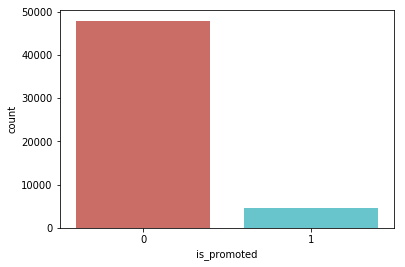

In [22]:
sns.countplot(x='is_promoted',data=traindata,palette='hls')

This is a skewed dataset, with unbalanced proportion of is_promoted count,
we balance this dataset by duplicating rows of is_promoted = 1 by 9 times.

In [23]:
data_p1 = traindata[traindata['is_promoted'] == 1]
traindatafinal = pd.concat([traindata,data_p1,data_p1,data_p1,data_p1,data_p1,data_p1,data_p1,data_p1,data_p1])

In [24]:
traindatafinal['is_promoted'].value_counts()

0    47853
1    45460
Name: is_promoted, dtype: int64

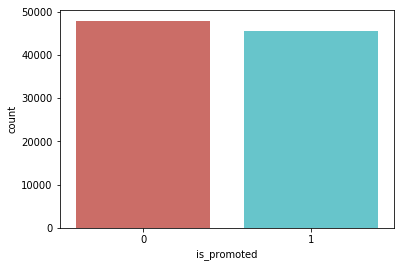

In [25]:
sns.countplot(x='is_promoted',data=traindatafinal,palette='hls')

traindatafinal.to_csv('hr-total-cat-equalized.csv')

In [26]:
traindatafinal.head()

,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_10,region_11,region_12,region_13,...,t8,t9,t10,m,r2,r3,r4,r5,referred,sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,35,8,1,0,49,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
65141,30,4,0,0,60,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7513,34,7,0,0,50,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2542,39,10,0,0,50,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48945,45,2,0,0,73,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
